<a href="https://colab.research.google.com/github/leeju0/AI_study/blob/main/clustering/GMM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs #임의 데이터셋 생성
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns


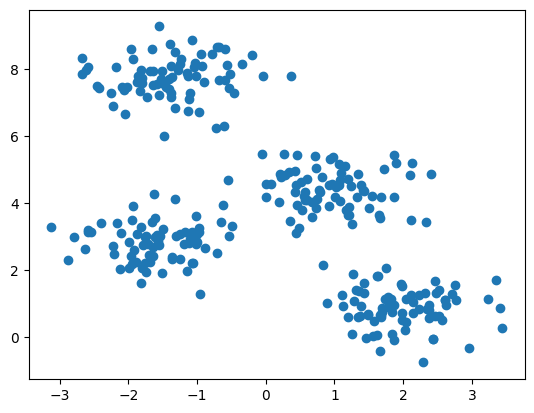

In [ ]:
#데이터생성 (300개의 샘플을 갖고, 클러스터 4개, 클러스터 표준편차는 0.6)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [ ]:
#모델 정의 및 학습(log likelihood를 최대화하는 파라미터 계산, 군집수는 4로)
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

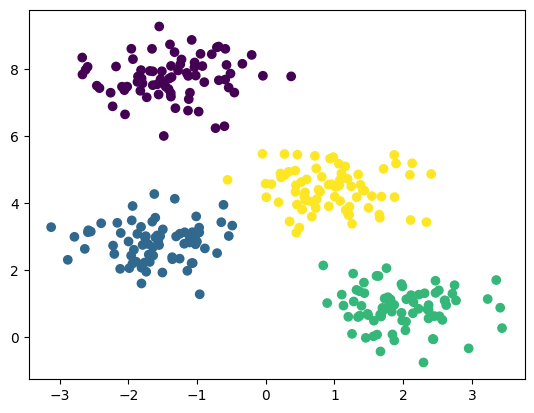

In [ ]:
labels = gmm.predict(X)
plt.scatter(X[:, 0],X[:, 1], c=labels, cmap='viridis')

In [ ]:
#관측치 레이블 확인
labels

array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1])

In [ ]:
#weight(pi) 값 확인 : 군집수 4개이므로 pi값 4개 (4개중 가장 큰 값으로 레이블링했을 것임)
gmm.predict_proba(X)

array([[8.04672295e-21, 2.38140471e-03, 9.71688955e-01, 2.59296402e-02],
       [9.99999993e-01, 2.34837535e-15, 7.13116691e-33, 7.15846263e-09],
       [2.04767765e-08, 9.13480329e-09, 8.78022033e-12, 9.99999970e-01],
       ...,
       [8.75462809e-09, 3.40976171e-05, 4.92339895e-10, 9.99965893e-01],
       [9.99996988e-01, 1.52780115e-18, 6.44915198e-30, 3.01241053e-06],
       [4.05180546e-15, 9.99999561e-01, 1.99754828e-11, 4.39280339e-07]])

Text(0.5, 0, 'n_components')

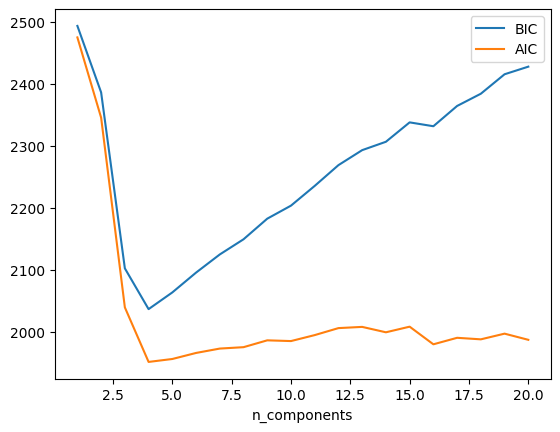

In [ ]:
#aic & bic
n_components = np.arange(1,21) #1~21 까지 군집개수
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components] #군집개수에 따라 모델 학습시켜 봄

#aic, bic 적용해보고 결과출력
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')

plt.legend(loc='best')
plt.xlabel('n_components')